## AirBnB price modeling - Boston and Seattle

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max.columns", None)
pd.set_option('min_rows', 50)
# pd.set_option('display.precision',4)

In [ ]:
# disable auto-scrolling

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### 1.1 Load the processed data

In [5]:
df_boston = pd.read_csv('results\df_listings_boston.csv', sep=',', index_col='id')
df_seattle = pd.read_csv('results\df_listings_seattle.csv', sep=',', index_col='id')
print("Boston listing data shape:  {}".format(df_boston.shape))
print("Seattle listing data shape: {}".format(df_seattle.shape))

Boston listing data shape:  (3560, 127)
Seattle listing data shape: (3798, 187)


### 1.2 Define Lasso model
1. StandardScaler was used to transform the data X. Scaler was performed on X_train and X_test separately. 
2. LassoCV was used to perform feature selection and to find best model (alpha) automatically.

In [6]:
def lasso_model(df):
    y = df['price']
    X= df.drop(columns=['price'], axis=1)

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # scale the data
    scaler=StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    # use LassoCV to find best alpha automatically
    lasso_model = LassoCV(cv=4, random_state=0) # Instantiate
    lasso_model.fit(X_train, y_train) #Fit

    train_score=lasso_model.score(X_train,y_train)
    test_score=lasso_model.score(X_test,y_test)
    coeff_used = np.sum(lasso_model.coef_!=0)

    print("best alpha: {}".format(lasso_model.alpha_))
    print("training score: {}".format(train_score))
    print("test score: {}".format(test_score))
    print("number of features used: {}".format(coeff_used))

    # find model's correlation coefficients
    coef = pd.Series(lasso_model.coef_, index = X.columns)
    coef.sort_values(ascending=False, inplace=True)
    print('\n')
    print(coef)
    
    # plot model's correlation coefficients
    imp_coef = pd.concat([coef.sort_values().head(16), coef.sort_values().tail(20)])
    plt.figure(figsize=(10, 15))
    imp_coef.plot(kind = 'barh')
    plt.title('Coefficients in the Lasso Model')

### 1.3 Boston price model
For Boston listing, the scores of both training and test data sets are 0.66, which are reasonably good. The final number of features used is 89. The list of coefficients shows the magnitude of each feature importance. 
For Boston listing, neighbourhood matters. And the price can go either up or down depending on the neighbourhood.

#### Positively correlated factors with correlation coefficient > 3
1. bedrooms, bathrooms, beds, accomodates, guest_included
 * This makes perfect sense. The more these variables are, the higher the price is. 
2. require_guest_phone_verification, host_is_superhost, calendar_updated, cancellation_policy_super_strict_30
 * These variables are somewhat related to the hosts' rental policies/characteristics. 
 * If require_guest_phone_verification is True, it is possibly because the host values his/her property. The more the host values his/her property, the more tendency the host will set the price high. 
 * The same logic above explains why cancellation_policy_super_strict_30 is positively correlated with price. 
 * Superhost's price tends to be higher than regular hosts. This is possibly because superhosts offer more values based on  services/aminities. 
 * The positive correlation between calendar_updated and price is somewhat hard to explain. One possible explanation is the longer the host has not updated his/her AirBnB calendar, the more hesitant the host is willing to rent his property, thus the higher rental price. 

3. amenity - TV, Air Conditioning, Indoor Fireplace, Doorman 
 * This makes perfect sense. Having Air Conditioning in summer, and Indoor Fireplace is desirable in Boston.
 * The presense of Doorman can also increase perceived value (thus charge higher price) by giving a sense of security to the potential customers.


#### Negatively correlated factors with correlation coefficient absolute value > 3
1. room_type Shared room, Private room
 * This makes sense. The whole house/apartment is always a better option if you can afford it. 
2. extra_people 
 * If there is a charge for extra people, the price is relatively lower. Sounds reasonable.
3. reviews_per_month, host_listings_count, require_guest_profile_picture
 * The more reviews_per_month, the lower the price tends to be. In the old days, consumers trust word of mouth. Nowdays, consumers read reviews. The more (positive) reviews, the better. To some extent, having no review is as bad as having slightly negative reviews, because it is hard for guests to trust your property. So hosts strive for reviews, especially positive reviews. To solicit more reviews, hosts have to attract more guests. One way is by charging slightly lower price. 
 * The more host_listings_counts, the lower the price is. One possible explanation is as the host owns more listings, the economy of scale will lower the average fixed cost per property, which enables the host to gain equal or higher profit while charging a lower price.
 * require_guest_profile_picture is negatively correlated with price. The host tends to trust guests with profile pictures. The host does not mind charging a slightly lower price knowing the guest(s) will take good care of his/her property. 
4. amenity - Free Parking on Premises, Kitchen, Hangers
 * It is possible that free parking is mostly offered at areas further away from blockbuster locations. As a result, the rental price tends to be cheaper. 
 * The same logic applies to Kitchen. 
 * For Hangers?
5. minimum_nights
 * The longer the rental period, the cheaper the price. Sounds reasonable. 

best alpha: 0.7345744435570088
training score: 0.6599006914891123
test score: 0.6638489338079514
number of features used: 89


bedrooms                                          24.042260
neighbourhood_cleansed_Back Bay                   16.983291
neighbourhood_cleansed_Beacon Hill                12.602399
neighbourhood_cleansed_South End                  11.447879
accommodates                                      11.326117
availability_60                                   10.260168
neighbourhood_cleansed_Downtown                   10.101484
require_guest_phone_verification_t                 9.872307
neighbourhood_cleansed_South Boston Waterfront     9.232958
guests_included                                    8.807285
neighbourhood_cleansed_Fenway                      8.217394
bathrooms                                          7.549266
amenity_TV                                         6.253456
amenity_Air Conditioning                           6.001403
amenity_Indoor Fireplace         

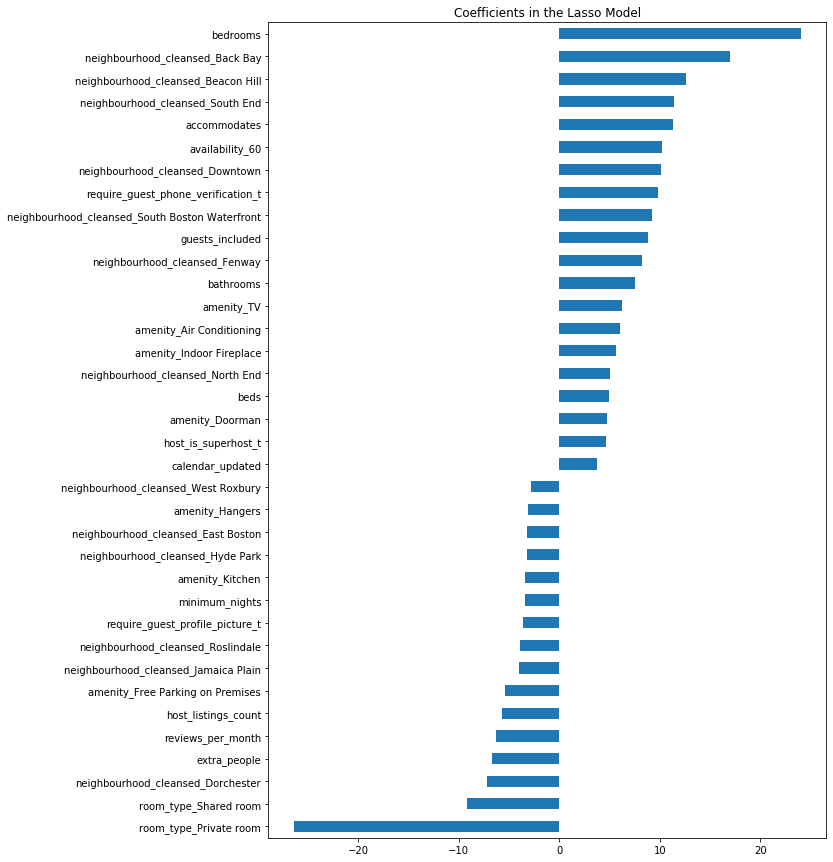

In [7]:
lasso_model(df_boston)

### 1.4 Seattle price model
For Seattle listing, the training score is 0.68, while the test score is 0.63, which are reasonably good. The final number of features used is 149. The list of coefficients shows the magnitude of each feature importance. 
Just like Boston listing, neighbourhood matters in Seattle too. And the price can go either up or down depending on the neighbourhood.

#### Positively correlated factors with correlation coefficient > 3
1. bedrooms, accomodates, bathrooms, guest_included, beds
 * This makes perfect sense. The more these variables are, the higher the price is. 
2. review_scores_rating, host_is_superhost, calendar_updated
 * These variables are somewhat related to the hosts' rental policies/characteristics.
 * review_scores_rating - the higher review score rating, the better services/values provided to the guests, the more guests interested, the higher demand, the higher price.
 * Superhost - same as the explanation for Boston
 * calendar_updated - same as the explanation for Boston
3. Amenity - Doorman, Elevator in Building
 * Doorman - same as the explanation for Boston
 * Elevator in Building - valuable to some guests. More value, higher price. 

#### Negatively correlated factors  with correlation coefficient absolute value > 2
1. room_type Private room， Shared room, Dorm
 * This makes sense. The whole house/apartment is always a better option if you can afford it. 
2. host_acceptance_rate， extra_people, reviews_per_month, review_scores_value
 * host_acceptance_rate - more possibly because of correlation only, not causal relationship. For some properties that are hard to get booked, such as remote areas, the hosts have no choice but to accept any reservation while charging a low price.
 * extra_people - same as the explanation for Boston
 * reviews_per_month - same as the explanation for Boston
 * review_scores_value: Value shopping guests tend to maximize utility/price. By doing so, they tend to choose properties that ask for lower prices. 


best alpha: 0.3009697813983334
training score: 0.6809131398220696
test score: 0.6345227147681184
number of features used: 149


bedrooms                                            24.812787
accommodates                                        12.848408
bathrooms                                            9.754120
neighbourhood_cleansed_Broadway                      6.573381
neighbourhood_cleansed_Pioneer Square                5.873957
guests_included                                      5.835421
neighbourhood_cleansed_Belltown                      5.499177
neighbourhood_cleansed_Lower Queen Anne              4.934555
amenity_Doorman                                      4.892648
review_scores_rating                                 4.390042
neighbourhood_cleansed_West Queen Anne               4.317937
host_is_superhost_t                                  4.253059
neighbourhood_cleansed_Central Business District     4.129166
neighbourhood_cleansed_Pike-Market                   3.741556
amen

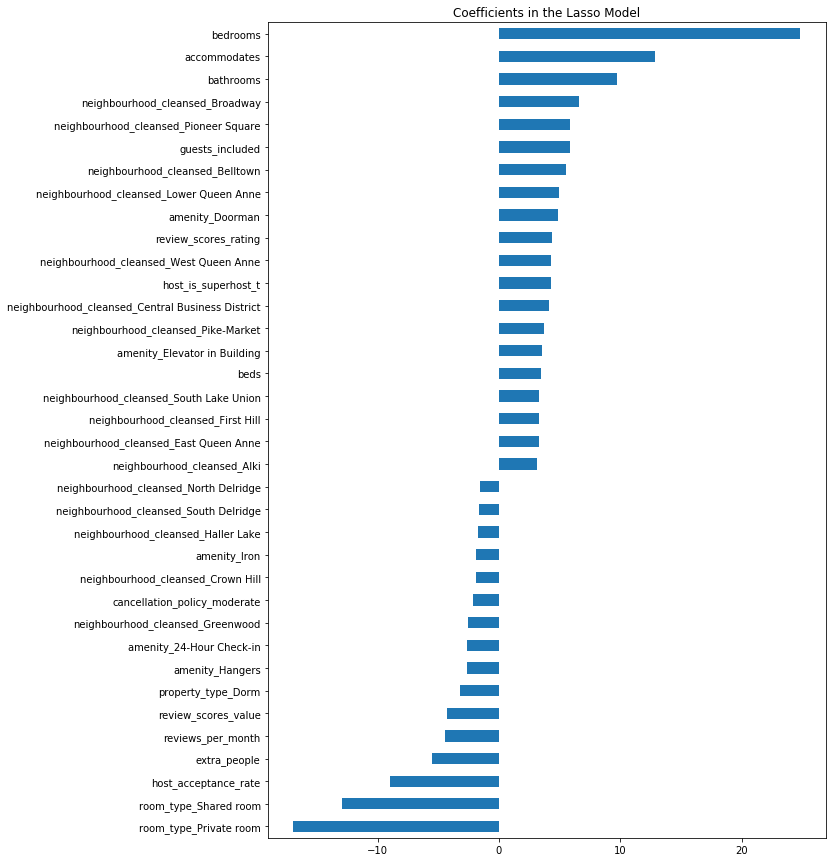

In [65]:
lasso_model(df_seattle)